
# What This NoteBook Include  
1. Post Processing 
2. Ensemble method using Ml Models
3. Ensemble method using DL Models (got me at 18 place out of 59)

## to see preprocessing part refer to Mutlicalss classification 




In [4]:
import warnings
warnings.filterwarnings('ignore')

import gc
import pickle  as pk
import os
import warnings
warnings.filterwarnings('ignore')

# Modules for data manipulation
import numpy as np
import pandas as pd
import re

# Modules for visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Tools for preprocessing input data
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
# Tools for creating ngrams and vectorizing input data
# import gensim

from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser



# Tools for building a model
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer



from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional,Flatten,GlobalMaxPooling1D,MaxPool1D
from keras.layers.embeddings import Embedding

from keras.preprocessing import text
from keras.preprocessing.sequence import pad_sequences

# Tools for assessing the quality of model prediction
from sklearn.metrics import accuracy_score, confusion_matrix,log_loss,f1_score


import tensorflow_hub as hub




In [99]:
train_data = pk.load(open('processed_train_data','rb'))
test_data = pk.load(open('processed_test_data','rb'))

train_data = train_data.append(train_data[train_data['Labels'] == 18])
train_data.reset_index(drop=True, inplace=True)

In [8]:
train_data.Labels.value_counts()

6     405
19    261
4     243
0     203
5     141
15    134
1     116
16    109
11    104
8      79
14     75
7      27
2      25
20     18
13     15
21      9
12      4
9       3
3       2
17      2
18      2
10      2
Name: Labels, dtype: int64

# Dealing with Unbalanced Data By Splitting classes w.r.t the size 

# Clsses with 200+ samples

In [9]:
classes = train_data.Labels.value_counts().index

print('classes with 200+ samples in datset {}'.format(classes[train_data.Labels.value_counts().values > 200]))

print('These samples will be trained by one model')



class_model_1 = classes[train_data.Labels.value_counts().values > 200]


classes with 200+ samples in datset Int64Index([6, 19, 4, 0], dtype='int64')
These samples will be trained by one model


# Classes with 100 + samples < 200+ samples 

In [10]:
classes = train_data.Labels.value_counts().index

samples  = train_data.Labels.value_counts().values

print('classes with 100+ samples but < 200+ in datset {}'.format( 
    classes[(samples> 100) &  (samples < 200)]))

print('These samples will be trained by one model')


class_model_2 = classes[(samples> 100) &  (samples < 200)]

classes with 100+ samples but < 200+ in datset Int64Index([5, 15, 1, 16, 11], dtype='int64')
These samples will be trained by one model


# Classes with < 100+ samples 

In [11]:
classes = train_data.Labels.value_counts().index

samples  = train_data.Labels.value_counts().values

print('classes with 100+ samples but < 200+ in datset {}'.format( 
    classes[(samples < 100)] ))

print('These samples will be trained by one model')


class_model_3 = classes[(samples <100)]

print(len(class_model_3))

classes with 100+ samples but < 200+ in datset Int64Index([8, 14, 7, 2, 20, 13, 21, 12, 9, 3, 17, 18, 10], dtype='int64')
These samples will be trained by one model
13


# Building a simple pipeline 

In [6]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression


tf_idf = TfidfVectorizer()


clf = LogisticRegression()


demo_data  = train_data[0:10]

x = demo_data['processed_script']
y = demo_data['Labels']

# print(x.shape,y.shape)


# print('sample',x[0])


params = [('tf_idf',tf_idf),('lr',clf)]

model_0 = Pipeline(params)


model_0.fit(x,y)

#evaluating the model

print('No. classes',np.unique(y))



pred = model_0.predict(x)

print(pred)

print('accuracy',accuracy_score(y,pred))


print(model_0.predict_proba(x)[0:3])




No. classes [ 1  4  6  8 15 16 19]
[ 8  4  6  6 16 15 19 15  1  6]
accuracy 1.0
[[0.11635422 0.11722429 0.17682101 0.20792566 0.14649872 0.11825384
  0.11692224]
 [0.11628772 0.2093109  0.17570306 0.1177257  0.14612592 0.11791386
  0.11693283]
 [0.11463685 0.11542628 0.27910711 0.11574459 0.14301449 0.11673956
  0.11533112]]


In [25]:
unseenlabel = train_data[train_data['Labels'] == 0]['processed_script'].values[0]

print(model_0.predict([unseenlabel]))

model_0.predict_proba([unseenlabel])



[6]


array([[0.12380272, 0.12655122, 0.20304908, 0.12820703, 0.16141277,
        0.13091352, 0.12606367]])

# Post Processing

# Building Vocab

In [6]:
from collections import Counter


for i in range(22):
    vocab = Counter()
    for script in train_data[train_data.Labels ==i].processed_script:



            vocab.update( script.split())

    print(f'class = {i} {vocab.most_common(10)}')

class = 0 [('the', 56246), ('look', 22902), ('get', 20009), ('back', 18206), ('int', 17161), ('one', 15022), ('you', 13591), ('ext', 13143), ('like', 12249), ('day', 11710)]
class = 1 [('the', 30033), ('look', 13099), ('get', 10251), ('back', 9655), ('int', 8122), ('one', 7750), ('ext', 7665), ('you', 7278), ('day', 7031), ('like', 6482)]
class = 2 [('the', 4377), ('look', 2454), ('get', 2073), ('back', 1829), ('head', 1382), ('like', 1297), ('you', 1283), ('hiccup', 1256), ('one', 1238), ('come', 1177)]
class = 3 [('jim', 955), ('franklin', 689), ('the', 435), ('get', 302), ('look', 243), ('come', 235), ('door', 231), ('you', 230), ('man', 227), ('eleanor', 213)]
class = 4 [('the', 44092), ('get', 28304), ('look', 27248), ('you', 19355), ('back', 18053), ('int', 18028), ('know', 17363), ('dont', 16941), ('like', 16322), ('she', 15110)]
class = 5 [('the', 29045), ('get', 18899), ('look', 17848), ('int', 13431), ('back', 12897), ('you', 12380), ('know', 11004), ('dont', 9921), ('she', 9

In [5]:
  # creating the voca file:
from collections import Counter


def get_vocab(x):
    vocab = Counter()


    for script in x:
        vocab.update( script.split())
        
    return vocab



# vocab = get_vocab(train_data.processed_script)

In [110]:
top_100_counts = vocab.most_common(100)


top_100_wordlist = set([word for word,_ in top_100_counts])
print(top_100_wordlist)

{'right', 'voice', 'phone', 'moment', 'say', 'around', 'tell', 'then', 'good', 'like', 'two', 'get', 'stop', 'little', 'toward', 'know', 'john', 'he', 'time', 'turn', 'look', 'behind', 'well', 'house', 'put', 'but', 'thats', 'man', 'call', 'cut', 'find', 'go', 'they', 'ext', 'head', 'work', 'car', 'hand', 'you', 'int', 'move', 'cant', 'side', 'make', 'street', 'it', 'another', 'open', 'leave', 'sit', 'walk', 'dont', 'day', 'stand', 'try', 'front', 'night', 'face', 'guy', 'take', 'run', 'door', 'beat', 'light', 'want', 'contd', 'still', 'one', 'she', 'let', 'shot', 'way', 'thing', 'eye', 'what', 'pull', 'the', 'hear', 'talk', 'smile', 'window', 'away', 'long', 'watch', 'think', 'old', 'room', 'youre', 'close', 'and', 'come', 'this', 'his', 'back', 'hold', 'there', 'give', 'something', 'continued', 'start'}


# Remove top_100 words Method 1 (not using this)

In [178]:
# # remove words which are not in vocab file
# train_docs = []
# import tqdm 
# for script in  tqdm.tqdm(train_data['processed_script']):
    
#     new_script = []
#     for words in script.split():
        
#         if words not in top_100_wordlist and len(words) > 3 and words not in custom_list:
#             new_script.append(words)
#     train_docs.append(list(set(new_script)))    


100%|██████████| 1979/1979 [00:24<00:00, 81.15it/s]


In [11]:
# word_count = list(map(lambda x : len(x),train_docs))

# sb.kdeplot(word_count)

# Mapper method 1  Stage 1

In [111]:

def mapper(script):
    
    new_script = []
    for words in script.split():
        
        if words not in top_100_wordlist and len(words) > 3:
            
           new_script.append(words)
        
        
    return ' '.join(new_script)  


train_data['post_processed_script'] = train_data['processed_script'].map(mapper)


In [15]:
from collections import Counter


for i in range(22):
    vocab2 = Counter()
    for script in train_data[train_data.Labels ==i].post_processed_script:



            vocab2.update( script.split())

    print(f'class = {i} {vocab2.most_common(10)}')

class = 0 [('fire', 5267), ('foot', 4802), ('across', 4406), ('wall', 4286), ('floor', 3990), ('star', 3913), ('step', 3900), ('suddenly', 3704), ('reach', 3655), ('jack', 3643)]
class = 1 [('jack', 4014), ('star', 2842), ('wall', 2691), ('fire', 2646), ('ship', 2511), ('foot', 2380), ('fall', 2255), ('suddenly', 2189), ('begin', 2116), ('across', 2115)]
class = 2 [('hiccup', 1256), ('shrek', 1067), ('jack', 805), ('coraline', 790), ('woody', 750), ('mater', 708), ('buzz', 601), ('dragon', 587), ('donkey', 570), ('suddenly', 565)]
class = 3 [('franklin', 689), ('eleanor', 213), ('louis', 157), ('love', 104), ('girl', 95), ('song', 91), ('helena', 83), ('fuck', 83), ('robbie', 78), ('people', 76)]
class = 4 [('yeah', 6490), ('really', 5619), ('okay', 5113), ('jack', 4845), ('would', 4481), ('mean', 4466), ('girl', 4447), ('woman', 4373), ('shes', 4337), ('could', 4327)]
class = 5 [('fuck', 3527), ('yeah', 3449), ('table', 2732), ('nick', 2696), ('wait', 2621), ('could', 2577), ('step', 

In [112]:
  # creating the voca file:
from collections import Counter

new_vocab = get_vocab(train_data.post_processed_script)
    

In [113]:
new_vocab.most_common(100)[:6]

[('woman', 34356),
 ('across', 33946),
 ('step', 33778),
 ('wall', 33724),
 ('star', 33648),
 ('would', 33408)]

# Mapper Filter 2

In [114]:


custom_list = ['with','whats','shes','onto']

def mapper(script):
    
    new_script = []
    for words in script.split():
        
        if words not in top_100_wordlist and len(words) > 3 and words not in custom_list:
            
           new_script.append(words)
        
        
    return ' '.join(list(set(new_script))) 


train_data['post_processed_script'] = train_data['processed_script'].map(mapper)


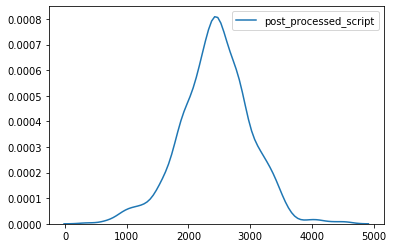

In [115]:


sb.kdeplot(train_data.post_processed_script.map(lambda x : len(x.split())))



# Test Data

In [100]:
  # creating the voca file:
from collections import Counter


test_vocab = get_vocab(test_data.processed_script)

In [101]:
print(len(test_vocab))
print(test_vocab.most_common(100))

90303
[('the', 197472), ('look', 99936), ('get', 89179), ('int', 73297), ('back', 71944), ('you', 63482), ('she', 61799), ('one', 56659), ('know', 54992), ('day', 52635), ('like', 52576), ('dont', 50889), ('come', 50613), ('take', 48883), ('go', 47111), ('and', 46471), ('ext', 45895), ('door', 45609), ('night', 45006), ('hand', 44094), ('room', 40777), ('turn', 39664), ('man', 37724), ('what', 34902), ('they', 34368), ('it', 33731), ('think', 33377), ('head', 33188), ('open', 32989), ('say', 32841), ('around', 32408), ('make', 32338), ('right', 31726), ('face', 31428), ('want', 30688), ('well', 30503), ('move', 30272), ('youre', 30083), ('contd', 30027), ('two', 29823), ('car', 29766), ('time', 29740), ('cut', 28465), ('away', 28233), ('stand', 27080), ('he', 26880), ('walk', 26818), ('eye', 26500), ('pull', 25607), ('but', 25109), ('start', 24513), ('thats', 24439), ('close', 24283), ('good', 23437), ('stop', 23358), ('continued', 22997), ('tell', 22915), ('way', 22821), ('watch', 227

In [102]:


custom_list = ['with','whats','shes','onto']

def mapper(script):
    
    new_script = []
    for words in script.split():
        
        if words not in top_100_wordlist and len(words) > 3 and words not in custom_list:
            
           new_script.append(words)
        
        
    return ' '.join(list(set(new_script))) 


test_data['post_processed_script'] = test_data['processed_script'].map(mapper)


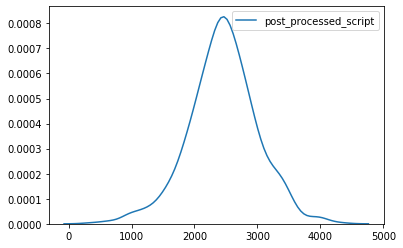

In [103]:


sb.kdeplot(test_data.post_processed_script.map(lambda x : len(x.split())))



# final data

# Last Test Data Transform

In [104]:
  # creating the voca file:
from collections import Counter

new_test_vocab  = get_vocab(test_data.post_processed_script)

In [105]:
len(new_test_vocab)

87360

In [132]:


final_test_words = set([word for word,counter in new_test_vocab.items() if counter >100])

len(final_test_words)

4635

In [133]:


def mapper(script):
    
    new_script = []
    for words in script.split():
        
        if words  in final_test_words:
            
           new_script.append(words)
        
        
    return ' '.join(list(set(new_script))) 


test_data['post_processed_script'] = test_data['post_processed_script'].map(mapper)


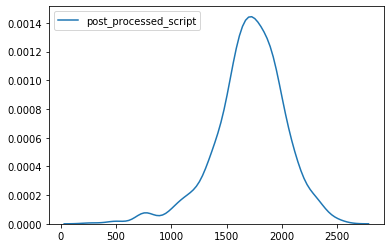

In [134]:


sb.kdeplot(test_data.post_processed_script.map(lambda x : len(x.split())))



# Last Train Data Transform

In [135]:
  # creating the voca file:
from collections import Counter

final_train = get_vocab(train_data.post_processed_script)
len(final_train)

28033

In [136]:
print(len(final_train))

final_word_list = set([word for word,counter in final_train.items() if counter >100])

len(final_word_list)


28033


8245

In [137]:


def mapper(script):
    
    new_script = []
    for words in script.split():
        
        if words  in final_word_list:
            
           new_script.append(words)
        
        
    return ' '.join(list(set(new_script))) 


train_data['post_processed_script'] = train_data['post_processed_script'].map(mapper)


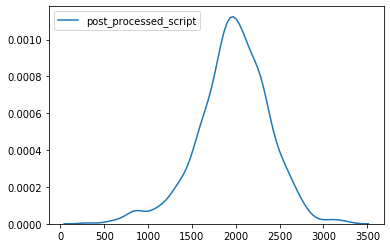

In [138]:


sb.kdeplot(train_data.post_processed_script.map(lambda x : len(x.split())))



In [38]:
# pk.dump(train_data,open('post_processed_train','wb'))
# pk.dump(test_data,open('post_processed_test','wb'))


In [2]:
train_data  = pk.load(open('post_processed_train','rb'))
test_data = pk.load(open('post_processed_test','rb'))

In [6]:
len(get_vocab(train_data.post_processed_script))

8245

In [7]:
len(get_vocab(test_data.post_processed_script))

8629

# Using Machine Learning Models


# Model 1

# Log loss without using Local Tokenizers 2.4

## Using Global Tokeinzer 


In [ ]:
'''
sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    norm='l2',
    min_df=0,
    smooth_idf=False,
'''

In [139]:
len(final_word_list)

8245

In [8]:
tf_global = TfidfVectorizer(norm='l2',
    min_df=0,
    smooth_idf=False,sublinear_tf=True)

global_vocab = tf_global.fit(list(train_data['post_processed_script']) + list(test_data.post_processed_script))

# global_metrix = tf_global.fit(train_data['post_processed_script'])




In [11]:
len(global_vocab.vocabulary_)

8837

# Traning entire data (all the classes on one classifier)

In [9]:
x_0 = []
y_0 = []
for i in range(22):
    
    if i == 6:
         x_0.extend(train_data[train_data.Labels == i]['post_processed_script'][0:203])
         y_0.extend(train_data[train_data.Labels == i]['Labels'][0:203])
    else:
        x_0.extend(train_data[train_data.Labels == i]['post_processed_script'])
        y_0.extend(train_data[train_data.Labels == i]['Labels'])



from sklearn.svm import SVC



from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.linear_model import LogisticRegression


from sklearn.decomposition import TruncatedSVD


from sklearn.preprocessing import LabelEncoder


from sklearn.multiclass import OneVsRestClassifier


clf_007 =  OneVsRestClassifier(LogisticRegression())


clf_001= SVC(C = 10,probability=True,random_state = 3,)




lb_1 = LabelEncoder()



tf_Mat = tf_global.transform(x_0)

# dimensionlaity reduction
t_svd_1 = TruncatedSVD(n_components=30,random_state = 3)

t_svd_1.fit(tf_Mat)

t_Mat = t_svd_1.transform(tf_Mat)



#Encoding The output
lb_1.fit(y_0)
labels = lb_1.transform(y_0)    
    
X_train, X_test, y_train, y_test = train_test_split(
    t_Mat,
    labels,
    stratify = labels,
    test_size=0.3,
    shuffle = True,
    random_state=3)    
    
    
    
    
    


clf_001.fit(X_train,y_train)


# print(accuracy_score(clf_001.predict(X_test),y_test))

print(log_loss(y_train,clf_001.predict_proba(X_train)))
print(log_loss(y_test,clf_001.predict_proba(X_test)))


1.8867674589658237
2.091899482680295


# Stratified 

In [10]:
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import VotingClassifier





sk = StratifiedKFold(n_splits = 5)

clf_007 =  LogisticRegression(C = 100)



vc = VotingClassifier([('SVC',clf_001),('Lr',clf_007)],voting = 'soft',weights = [0.4,0.6])


for train_index,test_index in sk.split(t_Mat,labels):
    
    train_x,train_y = t_Mat[train_index],labels[train_index]
    test_x,test_y = t_Mat[train_index],labels[train_index]
    
    
        
    
    print('svm')

    clf_001.fit(train_x,train_y)


    # print(accuracy_score(clf_001.predict(X_test),y_test))

    print(log_loss(train_y,clf_001.predict_proba(train_x)))
    print(log_loss(test_y,clf_001.predict_proba(test_x)))

   

    print('oneVSRest LR')
    
    clf_007.fit(train_x,train_y)


    # print(accuracy_score(clf_001.predict(X_test),y_test))

    print(log_loss(train_y,clf_007.predict_proba(train_x)))
    print(log_loss(test_y,clf_007.predict_proba(test_x)))


    
    print('VotingClassifier')
    
    vc.fit(train_x,train_y)


    # print(accuracy_score(clf_001.predict(X_test),y_test))

    print(log_loss(train_y,vc.predict_proba(train_x)))
    print(log_loss(test_y,vc.predict_proba(test_x)))



svm
1.8863111543643873
1.8863111543643873
oneVSRest LR
1.7539533552194708
1.7539533552194708
VotingClassifier
1.7873961529885347
1.7873961529885347
svm
1.8937641867600712
1.8937641867600712
oneVSRest LR
1.7612927171600183
1.7612927171600183
VotingClassifier
1.7938782574820833
1.7938782574820833
svm
1.8858035344522146
1.8858035344522146
oneVSRest LR
1.7593475301362327
1.7593475301362327
VotingClassifier
1.7908940137546678
1.7908940137546678
svm
1.9032793304342703
1.9032793304342703
oneVSRest LR
1.7796046215900703
1.7796046215900703
VotingClassifier
1.8101356896717455
1.8101356896717455
svm
1.8842799107919332
1.8842799107919332
oneVSRest LR
1.7623251706748486
1.7623251706748486
VotingClassifier
1.792449312611471
1.792449312611471


# XGBOOST (from Xgboost)

In [200]:
# import xgboost as xgb
# from sklearn.model_selection import cross_val_score
# from xgboost.sklearn import XGBClassifier # <3


# xgb_params = {'eta': 0.3, 
#               'max_depth': 5, 
#               'subsample': 0.8, 
#               'colsample_bytree': 0.8, 
#               'objective': 'multi:softmax',
#                'num_class':22,
#               'eval_metric': 'mlogloss', 
#               'seed': 23
#              }

    
# X_train, X_valid, y_train, y_valid = train_test_split(
#         t_Mat, labels, test_size=0.25, stratify = labels,random_state=23)    
    
    
# d_train = xgb.DMatrix(X_train, y_train)
# d_valid = xgb.DMatrix(X_valid, y_valid)

# watchlist = [(d_valid, 'valid')]
# xgb_model = xgb.train(xgb_params, d_train, 2000, 
#                   watchlist, verbose_eval=True,
#                   early_stopping_rounds=30)

# # print(model.attributes()['best_score'])
# # print(log_loss(y_train,vc.predict_proba(X_train)))
# # print(log_loss(y_test,vc.predict_proba(X_test_)))




[0]	valid-mlogloss:2.84646
Will train until valid-mlogloss hasn't improved in 30 rounds.
[1]	valid-mlogloss:2.70833
[2]	valid-mlogloss:2.61241
[3]	valid-mlogloss:2.55732
[4]	valid-mlogloss:2.54492
[5]	valid-mlogloss:2.52556
[6]	valid-mlogloss:2.51371
[7]	valid-mlogloss:2.51152
[8]	valid-mlogloss:2.51807
[9]	valid-mlogloss:2.53166
[10]	valid-mlogloss:2.55605
[11]	valid-mlogloss:2.57626
[12]	valid-mlogloss:2.60061
[13]	valid-mlogloss:2.63082
[14]	valid-mlogloss:2.65748
[15]	valid-mlogloss:2.68880
[16]	valid-mlogloss:2.71142
[17]	valid-mlogloss:2.73971
[18]	valid-mlogloss:2.77234
[19]	valid-mlogloss:2.80082
[20]	valid-mlogloss:2.83589
[21]	valid-mlogloss:2.85892
[22]	valid-mlogloss:2.88718
[23]	valid-mlogloss:2.90847
[24]	valid-mlogloss:2.94241
[25]	valid-mlogloss:2.97089
[26]	valid-mlogloss:2.99938
[27]	valid-mlogloss:3.02964
[28]	valid-mlogloss:3.05906
[29]	valid-mlogloss:3.09202
[30]	valid-mlogloss:3.12106
[31]	valid-mlogloss:3.14936
[32]	valid-mlogloss:3.17930
[33]	valid-mlogloss:3.20

In [210]:
dtest = xgb.DMatrix(X_valid)

accuracy_score(y_valid,xgb_model.predict(dtest))



0.12134831460674157

(1777, 5000)

In [19]:
# clf_777 = XGBClassifier(**xgb_params,n_estimators = 1000)
from xgboost.sklearn import XGBClassifier

xgb_params = {'eta': 0.3, 
              'max_depth': 5, 
              'subsample': 0.8, 
              'colsample_bytree': 0.8, 
              'objective': 'multi:softmax',
               'num_class':22,
              'eval_metric': 'mlogloss', 
              'seed': 23
             }
clf_777 = XGBClassifier(n_estimators  = 300,**xgb_params)

sk = StratifiedKFold(n_splits = 5)

t_svd_1 = TruncatedSVD(n_components=19,random_state = 17)

t_svd_1.fit(tf_Mat)

t_Mat = t_svd_1.transform(tf_Mat)



for train_index,test_index in sk.split(t_Mat,labels):
    
    
    train_x,train_y = t_Mat[train_index],labels[train_index]
    test_x,test_y = t_Mat[train_index],labels[train_index]
    
    
     
    clf_777.fit(train_x,train_y)


    print('acc',accuracy_score(clf_777.predict(test_x),test_y))

    print(log_loss(train_y,clf_777.predict_proba(train_x)))
    print(log_loss(test_y,clf_777.predict_proba(test_x)))


    



acc 0.5881104033970276
0.6506698552368734
0.6506698552368734
acc 0.5812146892655368
0.657921047212862
0.657921047212862
acc 0.5756509500351865
0.6657339699363314
0.6657339699363314
acc 0.5729312762973352
0.6734408421301517
0.6734408421301517
acc 0.5824022346368715
0.6620734449354548
0.6620734449354548


In [227]:
# pk.dump(clf_777,open('xgboost_0.65','wb'))

# final Model 

In [232]:

vc_final = VotingClassifier([('SVC',clf_001),('Lr',clf_007),('xgboost',clf_777)],voting = 'soft',weights = [0.05,0.05,0.9])


for train_index,test_index in sk.split(t_Mat,labels):
    
    train_x,train_y = t_Mat[train_index],labels[train_index]
    test_x,test_y = t_Mat[train_index],labels[train_index]
    
    print('VotingClassifier')
    
    vc_final.fit(train_x,train_y)


    # print(accuracy_score(clf_001.predict(X_test),y_test))

    print(log_loss(train_y,vc_final.predict_proba(train_x)))
    print(log_loss(test_y,vc_final.predict_proba(test_x)))




VotingClassifier
[22:16:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.7195138200832065
0.7195138200832065
VotingClassifier
[22:16:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.726265911917592
0.726265911917592
VotingClassifier
[22:16:25] WARNING: C:\Users\Administrator\

KeyboardInterrupt: 

# todo tomorow :
## 1 Remove the words form test data which are not present in train and reduce the size
## 2 Make 3 predictions 1 VoterClassider ,2 Xgboost (single) , 3 (with xgboost)


## maybe try the ensembly approach with the xgboost 

# Testing Phase

In [11]:
to_keep_vocab = global_vocab.vocabulary_
print(len(to_keep_vocab))

8837


In [12]:
len(get_vocab(test_data.post_processed_script))

8629

In [20]:
# Test

X_test = test_data.post_processed_script

X_mat = global_vocab.transform(X_test)


print(X_mat.shape)

X_trunc_metrix = t_svd_1.transform(X_mat)

print(X_trunc_metrix.shape)





(849, 8837)
(849, 19)


In [21]:
last_hope = clf_777.predict_proba(X_trunc_metrix)

In [16]:
last_hope.shape

(849, 22)

In [18]:
test_set_preds = pd.DataFrame(columns = train_data.Labels.unique().tolist())
test_set_preds.insert(0, 'File_Name', test_data.File_Name)
test_set_preds.iloc[:,1:] = last_hope
#Reorder the columns to match the Sample_submission_file
test_set_preds = test_set_preds[['File_Name',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
#Write your submissions to an excel file
test_set_preds.to_excel('xgboost_0.67.xlsx', index=False)
test_set_preds.head()

,File_Name,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,file_2300.txt,0.0203746,0.256807,0.00192161,0.00271132,0.0134854,0.00103042,0.00724338,0.00202243,0.00886163,...,0.00468113,0.0183494,0.0105041,0.274478,0.000894042,0.107195,0.000909632,0.034422,0.160558,0.0141483
1,file_809.txt,0.0265346,0.115094,0.00112803,0.00601444,0.0195629,0.000644091,0.0102281,0.00383926,0.0101895,...,0.000963731,0.00792053,0.0173301,0.526997,0.00164413,0.0231886,0.000470582,0.0404494,0.172802,0.00890454
2,file_1383.txt,0.059028,0.0702869,0.00239485,0.00288999,0.168255,0.000793414,0.00361499,0.00186513,0.085961,...,0.00135496,0.0192882,0.00780037,0.0280926,0.00192657,0.132114,0.00111556,0.00325115,0.0322461,0.335363
3,file_983.txt,0.0228592,0.259413,0.00163687,0.00572888,0.0155225,0.00543341,0.00557773,0.0044616,0.0211099,...,0.0387234,0.0247196,0.0125988,0.200335,0.00113335,0.154933,0.00106765,0.0883508,0.0833734,0.0147211
4,file_1713.txt,0.0525641,0.0489496,0.00121302,0.0134173,0.200672,0.00125134,0.0221602,0.00326262,0.311965,...,0.00223729,0.070502,0.00943287,0.0305178,0.00337222,0.0526848,0.00478729,0.0160717,0.012502,0.0443438


In [110]:
test_set_preds.iloc[0].values[1:]

array([0.03072764683426654, 0.3301728750926622, 0.003534215424455707,
       0.009383974257669896, 0.030960649041224326, 0.004085185928148056,
       0.013001092050785142, 0.004681667875966317, 0.038708245765577604,
       0.009360098833853173, 0.00350888281929223, 0.05425227517822947,
       0.0035468558312326637, 0.03290232221842, 0.014953211564776909,
       0.1509801529656939, 0.0035394544662308634, 0.0936290808486004,
       0.0059040051830063335, 0.05699680297839011, 0.07785796989177841,
       0.027313334949739643], dtype=object)

# Ensembly

In [39]:
print('predicting classes {}'.format(class_model_1))

x_1 = []
y_1 = []
for i in class_model_1:
    
    if i == 6:
         x_1.extend(train_data[train_data.Labels == i]['post_processed_script'][0:203])
         y_1.extend(train_data[train_data.Labels == i]['Labels'][0:203])
    
    x_1.extend(train_data[train_data.Labels == i]['post_processed_script'])
    y_1.extend(train_data[train_data.Labels == i]['Labels'])

    



from sklearn.svm import SVC



from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.linear_model import LogisticRegression


from sklearn.decomposition import TruncatedSVD


from sklearn.preprocessing import LabelEncoder



clf2_1 = SVC(C = 10,probability=True,random_state = 3,gamma = 0.1)



# tf_idf_1  = TfidfVectorizer()
t_svd_1 = TruncatedSVD(n_components=17)

lb_1 = LabelEncoder()



#Encoding Input
# vocab = tf_idf_1.fit(x_1)
tf_Mat = tf_global.transform(x_1)

# dimensionlaity reduction

t_Mat = t_svd_1.fit_transform(tf_Mat)

#Encoding The output
lb_1.fit(y_1)
labels = lb_1.transform(y_1)    
    
X_train, X_test, y_train, y_test = train_test_split(
    t_Mat,
    labels,
    test_size=0.3,
    shuffle = True,
    random_state=3)    
    
    
    
    
    


clf2_1.fit(X_train,y_train)


accuracy_score(clf2_1.predict(X_test),y_test)



predicting classes Int64Index([6, 19, 4, 0], dtype='int64')


0.5417721518987342

In [40]:
print(log_loss(y_train,clf2_1.predict_proba(X_train)))
print(log_loss(y_test,clf2_1.predict_proba(X_test)))

1.0018500212556198
1.0172510057486666


In [180]:
lb_1.classes_

array([ 0,  4,  6, 19])

# Model 2

In [209]:
print('predicting classes {}'.format(class_model_2))

x_2 = []
y_2 = []
for i in class_model_2:
    
    x_2.extend(train_data[train_data.Labels == i]['post_processed_script'])
    y_2.extend(train_data[train_data.Labels == i]['Labels'])

    



from sklearn.svm import SVC



from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.linear_model import LogisticRegression



from sklearn.decomposition import TruncatedSVD


from sklearn.preprocessing import LabelEncoder



from xgboost import XGBClassifier



# clf_2 = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)




clf2_2 = SVC(C = 10,probability=True,random_state = 3)

clf1  = LogisticRegression()


# tf_idf_2  = TfidfVectorizer()
t_svd_2 = TruncatedSVD(n_components=20,random_state=3)
lb_2 = LabelEncoder()



#Encoding Input
# vocab_2  = tf_idf_2.fit(x_2)
tf_Mat_2 = tf_global.transform(x_2)

# dimensionlaity reduction

t_Mat_2 = t_svd_2.fit_transform(tf_Mat_2)

#Encoding The output
lb_2.fit(y_2)
labels_2 = lb_2.transform(y_2)    
    
X_train, X_test, y_train, y_test = train_test_split(
    t_Mat_2,
    labels_2,
    test_size=0.3,
    shuffle = True,
    random_state=3)    
    
    
    
    
    

clf2_2.fit(X_train,y_train)


print(accuracy_score(clf2_2.predict(X_test),y_test))


print(log_loss(y_train,clf2_2.predict_proba(X_train)))
print(log_loss(y_test,clf2_2.predict_proba(X_test)))

predicting classes Int64Index([5, 15, 1, 16, 11], dtype='int64')
0.6043956043956044
1.009030644070039
1.0260782339401135


In [68]:
lb_2.classes_

array([ 1,  5, 11, 15, 16])

# Model 3 

In [219]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [246]:
print('predicting classes {} length of {}'.format(class_model_3,len(class_model_3)))
class_model_tmp = [8, 14, 7, 2,]
x_3 = []
y_3 = []
for i in class_model_tmp:
    
    x_3.extend(train_data[train_data.Labels == i]['post_processed_script'])
    y_3.extend(train_data[train_data.Labels == i]['Labels'])

    
print(pd.Series(y_3).value_counts())


from sklearn.svm import SVC



from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.linear_model import LogisticRegression



from sklearn.decomposition import TruncatedSVD


from sklearn.preprocessing import LabelEncoder



from xgboost import XGBClassifier



# clf_3 = XGBClassifier(max_depth=1, n_estimators=300, learning_rate=0.1,subsample=0.8,gamma = 2)



clf2_3 = SVC(C = 200,probability=True,random_state = 3,gamma = 0.01)

clf1  = LogisticRegression()


# tf_idf_3  = TfidfVectorizer()
t_svd_3 = TruncatedSVD(n_components=20)
lb_3 = LabelEncoder()



#Encoding Input
# vocab_3  = tf_idf_3.fit(x_3)
tf_Mat_3 = tf_global.transform(x_3)

# dimensionlaity reduction

t_Mat_3 = t_svd_3.fit_transform(tf_Mat_3)

#Encoding The output
lb_3.fit(y_3)
labels_3 = lb_3.transform(y_3)    
    
X_train, X_test, y_train, y_test = train_test_split(
    t_Mat_3,
    labels_3,
    test_size=0.3,
    stratify= labels_3,
    shuffle = True,
    random_state=3)    
    
    

clf2_3.fit(X_train,y_train)


accuracy_score(clf2_3.predict(X_test),y_test)

print(log_loss(y_train,clf2_3.predict_proba(X_train)))
print(log_loss(y_test,clf2_3.predict_proba(X_test)))


predicting classes Int64Index([8, 14, 7, 2, 20, 13, 21, 12, 9, 3, 17, 18, 10], dtype='int64') length of 13
8     79
14    75
7     27
2     25
dtype: int64
0.9593068711010392
1.0135385822479928


In [253]:
print('predicting classes {} length of {}'.format(class_model_3,len(class_model_3)))
class_model_tmp = [20, 13, 21, 12, 9, 3, 17, 18, 10]
x_4 = []
y_4 = []
for i in class_model_tmp:
    
    x_4.extend(train_data[train_data.Labels == i]['post_processed_script'])
    y_4.extend(train_data[train_data.Labels == i]['Labels'])

    
print(pd.Series(y_4).value_counts())


from sklearn.svm import SVC



from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.linear_model import LogisticRegression



from sklearn.decomposition import TruncatedSVD


from sklearn.preprocessing import LabelEncoder



from xgboost import XGBClassifier



# clf_3 = XGBClassifier(max_depth=1, n_estimators=300, learning_rate=0.1,subsample=0.8,gamma = 2)



clf2_4 = SVC(C = 200,probability=True,random_state = 3,gamma = 0.01)

clf1  = LogisticRegression()


# tf_idf_3  = TfidfVectorizer()
t_svd_4 = TruncatedSVD(n_components=20)
lb_4 = LabelEncoder()



#Encoding Input
# vocab_3  = tf_idf_3.fit(x_3)
tf_Mat_4 = tf_global.transform(x_4)

# dimensionlaity reduction

t_Mat_4 = t_svd_4.fit_transform(tf_Mat_4)

#Encoding The output
lb_4.fit(y_4)
labels_4 = lb_4.transform(y_4)    
    
# X_train, X_test, y_train, y_test = train_test_split(
#     t_Mat_4,
#     labels_4,
#     test_size=0.2,
#     stratify= labels_4,
#     shuffle = True,
#     random_state=3)    
    
    

clf2_4.fit(t_Mat_4,labels_4)


# accuracy_score(clf2_4.predict(X_test),y_test)

print(log_loss(labels_4,clf2_4.predict_proba(X_train)))
# print(log_loss(y_test,clf2_4.predict_proba(X_test)))


predicting classes Int64Index([8, 14, 7, 2, 20, 13, 21, 12, 9, 3, 17, 18, 10], dtype='int64') length of 13
20    18
13    15
21     9
12     4
9      3
18     2
17     2
10     2
3      2
dtype: int64
1.4301146368429867


In [244]:
lb_3.classes_

array([ 2,  7,  8, 14])

# Predicting Test

In [40]:
(1.17 + 1.268 + 1.715 )/ 3

1.3843333333333332

In [245]:

X = train_data['post_processed_script']
Y = train_data['Labels']





def get_prediction(svd,model,data_x,data_y):
    
    mat_x = tf_global.transform(data_x)
    mat_x_svd = svd.transform(mat_x)
    return model.predict_proba(mat_x_svd)





# print("model 1")
# # for model 1 
# pred1 = get_prediction(t_svd_1,clf2_1,X,Y)

# print("model 2")
# #for model 2 
# pred2 = get_prediction(t_svd_2,clf2_2,X,Y)

# print("model 3")
# #for model 3 
# pred3 = get_prediction(t_svd_3,clf2_3,X,Y)

# print("model 4")
# #for model 4
# pred4 = get_prediction(t_svd_4,clf2_4,X,Y)




print(pred3.shape)
print(pred4.shape)



#label index order for model 1 
index_model_1 = lb_1.classes_
index_model_2 = lb_2.classes_
index_model_3 = lb_3.classes_
index_model_4 = lb_4.classes_


print(index_model_1)
print(index_model_2)
print(index_model_3)
print(index_model_4)




size = X.shape[0]

final_pred = np.zeros((size,22),dtype = 'float32')


for row in range(size):
    
    for index_list,pred_list in zip([index_model_1,index_model_2,index_model_3,index_model_4],\
                                    [pred1,pred2,pred3,pred4]):

        for i in range(22):

            if i in index_list:

                index = np.where(index_list == i)
                print(index,i,row,pred_list)
                final_pred[row][i] = pred_list[row][index[0][0]]


log_loss(train_data['Labels'].values,final_pred)

(1979, 4)
(1979, 4)
[ 0  4  6 19]
[ 1  5 11 15 16]
[ 2  7  8 14]
[ 3  9 10 12 13 17 18 20 21]
(array([0], dtype=int64),) 0 0 [[0.17691243 0.11616426 0.54430632 0.16261698]
 [0.02303156 0.25972237 0.58029827 0.1369478 ]
 [0.10904387 0.00722144 0.44334848 0.44038621]
 ...
 [0.03589067 0.1333495  0.65322386 0.17753596]
 [0.24085114 0.08174546 0.30462671 0.37277669]
 [0.31919757 0.16741356 0.22560061 0.28778825]]
(array([1], dtype=int64),) 4 0 [[0.17691243 0.11616426 0.54430632 0.16261698]
 [0.02303156 0.25972237 0.58029827 0.1369478 ]
 [0.10904387 0.00722144 0.44334848 0.44038621]
 ...
 [0.03589067 0.1333495  0.65322386 0.17753596]
 [0.24085114 0.08174546 0.30462671 0.37277669]
 [0.31919757 0.16741356 0.22560061 0.28778825]]
(array([2], dtype=int64),) 6 0 [[0.17691243 0.11616426 0.54430632 0.16261698]
 [0.02303156 0.25972237 0.58029827 0.1369478 ]
 [0.10904387 0.00722144 0.44334848 0.44038621]
 ...
 [0.03589067 0.1333495  0.65322386 0.17753596]
 [0.24085114 0.08174546 0.30462671 0.3727766

IndexError: index 4 is out of bounds for axis 0 with size 4

In [145]:

X = test_data['post_processed_script']
# Y = train_data['Labels']





def get_prediction(svd,model,data_x,data_y):
    
    mat_x = tf_global.transform(data_x)
#     mat_x_svd = svd.transform(mat_x)
    return model.predict_proba(mat_x)






# for model 1 
pred1 = get_prediction(t_svd_1,clf2_1,X,Y)

#for model 2 
pred2 = get_prediction(t_svd_2,clf2_2,X,Y)

#for model 3 
pred3 = get_prediction(t_svd_3,clf2_3,X,Y)





#label index order for model 1 
index_model_1 = lb_1.classes_
index_model_2 = lb_2.classes_
index_model_3 = lb_3.classes_

print(index_model_1)
print(index_model_2)





size = X.shape[0]

final_pred = np.zeros((size,22),dtype = 'float32')


for row in range(size):
    
    for index_list,pred_list in zip([index_model_1,index_model_2,index_model_3],[pred1,pred2,pred3]):

        for i in range(22):

            if i in index_list:

                index = np.where(index_list == i)

                final_pred[row][i] = pred_list[row][index[0][0]]


# log_loss(train_data['Labels'].values,final_pred)

[ 0  4  6 19]
[ 1  5 11 15 16]


In [151]:
final_pred.shape

(849, 22)

In [150]:
test_set_preds = pd.DataFrame(columns = train_data.Labels.unique().tolist())
test_set_preds.insert(0, 'File_Name', test_data.File_Name)
test_set_preds.iloc[:,1:] = final_pred
#Reorder the columns to match the Sample_submission_file
test_set_preds = test_set_preds[['File_Name',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
#Write your submissions to an excel file
test_set_preds.to_excel('ensemble_trick_.22.xlsx', index=False)
test_set_preds.head()

,File_Name,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,file_2300.txt,0.0590446,0.110904,0.123339,0.00779356,0.269485,0.190301,0.408658,0.0905355,0.266962,...,0.0278881,0.0536573,0.318561,0.293053,0.163751,0.00729391,0.00786818,0.262812,0.0469967,0.0283784
1,file_809.txt,0.0558275,0.069993,0.156681,0.0190342,0.358553,0.431873,0.394698,0.142071,0.178258,...,0.0370238,0.156779,0.0900571,0.347557,0.104849,0.0186037,0.0184544,0.190921,0.114629,0.024276
2,file_1383.txt,0.382035,0.382427,0.0778835,0.00725576,0.0992691,0.0212028,0.266773,0.0454838,0.257237,...,0.0243531,0.049127,0.3976,0.0933179,0.24236,0.00692002,0.00670784,0.251923,0.0898142,0.0203188
3,file_983.txt,0.117034,0.14571,0.126163,0.0132169,0.243777,0.293902,0.359119,0.122018,0.274157,...,0.0302118,0.124041,0.133482,0.270059,0.14759,0.0122129,0.012864,0.280071,0.080105,0.0349052
4,file_1713.txt,0.406302,0.379168,0.0426529,0.00799054,0.0726156,0.0148352,0.322734,0.02845,0.243344,...,0.0182559,0.0313115,0.489093,0.0726283,0.233985,0.00772974,0.00741196,0.198349,0.054791,0.0535518


# Deep Learning Part

# Approach 2 Global Tokenizer 

In [113]:
text.Tokenizer?

In [148]:
global_tokenizer = text.Tokenizer()

global_tokenizer.fit_on_texts(train_data.post_processed_script)



#list(train_data['processed_script']) + list(test_data['processed_script'])

In [152]:
#vocab size 
vocab_size = len(global_tokenizer.word_counts) + 1

# Model for class_model_1

In [161]:

print('predicting classes {}'.format(class_model_1))

x_1 = []
y_1 = []



for i in class_model_1:
    
    if i == 6:
        x_1.extend(train_data[train_data.Labels == i]['post_processed_script'][0:230])
        y_1.extend(train_data[train_data.Labels == i]['Labels'][0:230])
    else:
        x_1.extend(train_data[train_data.Labels == i]['post_processed_script'])
        y_1.extend(train_data[train_data.Labels == i]['Labels'])
        

        
        
print(pd.Series(y_1).value_counts())        
        


sequences = global_tokenizer.texts_to_matrix(x_1,mode = 'tfidf')


X_pad = pad_sequences(sequences,maxlen=5000,padding = 'post')

from sklearn.preprocessing import LabelBinarizer


br = LabelBinarizer()

br.fit(y_1)

Y = br.transform(y_1)


X_pad = X_pad.reshape(-1,5000,1)

    
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    Y,
    test_size=0.3,
    shuffle = True,
    random_state=3)    
    

    
    
model = Sequential()
# model.add(Embedding(input_dim= vocab_size,output_dim=8,input_length=5000))
model.add(LSTM(128, recurrent_dropout=0.1,input_shape = (5000,1)))
# model.add(MaxPool1D(12))
# model.add(Flatten())
# model.add(Dense(16,activation = 'relu'))
# model.add(Dense(128))
# model.add(Dropout(0.5))
# model.add(Dense(32))
model.add(Dense(len(class_model_1), activation='softmax'))

model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy'])

model.summary()


history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=20)

print(log_loss(y_train,model.predict(X_train)))
print(log_loss(y_test,model.predict(X_test)))

predicting classes Int64Index([6, 19, 4, 0], dtype='int64')
19    261
4     243
6     230
0     203
dtype: int64
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 67,076
Trainable params: 67,076
Non-trainable params: 0
_________________________________________________________________
Train on 655 samples, validate on 282 samples
Epoch 1/20
 64/655 [=>............................] - ETA: 7:02 - loss: 0.5624 - accuracy: 0.7500

KeyboardInterrupt: 

#  Model for class_model_2

In [333]:

print('predicting classes {}'.format(class_model_2))

x_2 = []
y_2 = []
for i in class_model_2:
    
    x_2.extend(train_data[train_data.Labels == i]['processed_script'])
    y_2.extend(train_data[train_data.Labels == i]['Labels'])

    





# tokenizer2 = text.Tokenizer(num_words = 6000)
# tokenizer2.fit_on_texts(x_2)
sequences = global_tokenizer.texts_to_matrix(x_2)

X_pad = pad_sequences(sequences,maxlen=15000)

from sklearn.preprocessing import LabelBinarizer


br2 = LabelBinarizer()

br2.fit(y_2)

Y = br2.transform(y_2)



    
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    Y,
    stratify= Y,
    test_size=0.2,
    shuffle = True,
    random_state=3)    
    

    
    
model_2 = Sequential()
model_2.add(Embedding(input_dim= 10000,output_dim=8,input_length=15000))
# model.add(LSTM(128, recurrent_dropout=0.1))
model_2.add(MaxPool1D(8))
model_2.add(Flatten())
model_2.add(Dense(128))
# model.add(Dense(128))
model_2.add(Dropout(0.3))
# model.add(Dense(32))
model_2.add(Dense(len(class_model_2), activation='softmax'))

model_2.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy'])

model_2.summary()


history = model_2.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=10)


print(log_loss(y_train,model_2.predict(X_train)))
print(log_loss(y_test,model_2.predict(X_test)))

predicting classes Int64Index([5, 15, 1, 16, 11], dtype='int64')
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_53 (Embedding)     (None, 15000, 8)          80000     
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 1875, 8)           0         
_________________________________________________________________
flatten_53 (Flatten)         (None, 15000)             0         
_________________________________________________________________
dense_99 (Dense)             (None, 128)               1920128   
_________________________________________________________________
dropout_67 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 5)                 645       
Total params: 2,000,773
Trainable params: 2,000,773
No

In [ ]:

print('predicting classes {}'.format(class_model_3))

x_3 = []
y_3 = []
for i in class_model_3:
    
    x_3.extend(train_data[train_data.Labels == i]['processed_script'])
    y_3.extend(train_data[train_data.Labels == i]['Labels'])

    





# tokenizer3 = text.Tokenizer(num_words = 6000)
# tokenizer3.fit_on_texts(x_3)



sequences = global_tokenizer.texts_to_matrix(x_3)

X_pad = pad_sequences(sequences,maxlen=15000)

from sklearn.preprocessing import LabelBinarizer


br3 = LabelBinarizer()

br3.fit(y_3)

Y = br3.transform(y_3)



    
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    Y,
    stratify= Y,
    test_size=0.3,
    shuffle = True,
    random_state=3)    
    

    
    
model_3 = Sequential()
model_3.add(Embedding(input_dim= 10000,output_dim=8,input_length=15000))
model_3.add(LSTM(128, recurrent_dropout=0.3))
# model_3.add(GlobalMaxPooling1D())
# model_3.add(Flatten())
# model_3.add(Dense(256))
# model.add(Dense(128))
# # model_3.add(Dropout(0.3))
# model.add(Dense(32))
model_3.add(Dense(len(class_model_3), activation='softmax'))

model_3.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy'])

model_3.summary()


history = model_3.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=3)

print(log_loss(y_train,model_3.predict(X_train)))
print(log_loss(y_test,model_3.predict(X_test)))


predicting classes Int64Index([8, 14, 7, 2, 20, 13, 21, 12, 9, 3, 17, 18, 10], dtype='int64')
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_71 (Embedding)     (None, 15000, 8)          80000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 15000, 128)        70144     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 128)               0         
_________________________________________________________________
dense_134 (Dense)            (None, 13)                1677      
Total params: 151,821
Trainable params: 151,821
Non-trainable params: 0
_________________________________________________________________
Train on 184 samples, validate on 79 samples
Epoch 1/3


# Checking if models are any good on validation data

In [336]:
pred1 = model.predict(X_test)
pred2 = model_2.predict(X_test)
pred3 = model_3.predict(X_test)

size = X_test.shape[0]


final_pred = np.zeros(shape = (size,22),dtype = 'float32')

print(pred1.shape)



(53, 4)


# Stiching : (combining the outputs of all 3 models)

In [319]:

# def get_preds(x):

index_model_1 = br.classes_
index_model_2 = br2.classes_
index_model_3 = br3.classes_

print(index_model_1)
print(index_model_2)
print(index_model_3)

for row in range(size):
    
    for index_list,pred_list in zip([index_model_1,index_model_2,index_model_3],[pred1,pred2,pred3]):

        for i in range(22):

            if i in index_list:

                index = np.where(index_list == i)
#                 print(i,index[0][0])
#                 print(final_pred[row][i],pred_list[index[0][0]])
                
                final_pred[row][i] = pred_list[row][index[0][0]]



[ 0  4  6 19]
[ 1  5 11 15 16]
[ 2  3  7  8  9 10 12 13 14 17 18 20 21]


IndexError: index 273 is out of bounds for axis 0 with size 273

In [298]:
pred777 = np.argmax(final_pred,axis = 1)

In [330]:
# y_test[pred777 == 8]

In [302]:
sample = X_test[2]

print(y_test[2])

print(model.predict(sample.reshape(1,-1)))
print(model_2.predict(sample.reshape(1,-1)))
print(model_3.predict(sample.reshape(1,-1)))
                  


[0 0 0 1]
[[0.1998239  0.12551732 0.2954262  0.3792326 ]]
[[0.18729632 0.29565173 0.07183705 0.2905894  0.15462548]]
[[0.00786015 0.03780861 0.01138598 0.4925472  0.02531686 0.02005535
  0.02738457 0.03504599 0.23855843 0.00733564 0.04922697 0.03013035
  0.01734385]]


In [254]:
final_pred[2]

array([0.37874773, 0.18132798, 0.00723269, 0.03627384, 0.14956091,
       0.28654882, 0.24669273, 0.01026894, 0.48427323, 0.02416245,
       0.01876203, 0.07133985, 0.02613264, 0.03216102, 0.2603025 ,
       0.30183902, 0.15894431, 0.00707526, 0.04958217, 0.22499858,
       0.02749178, 0.01628139], dtype=float32)

# Calculating  log loss of entire dataset

In [352]:

X = train_data['processed_script']
Y = train_data['Labels']


X_pad_full = pad_sequences(global_tokenizer.texts_to_sequences(X),15000)


pred1 = model.predict(X_pad_full)
pred2 = model_2.predict(X_pad_full)
pred3 = model_3.predict(X_pad_full)

size = X_pad_full.shape[0]


final_pred = np.zeros(shape = (size,22),dtype = 'float32')


index_model_1 = br.classes_
index_model_2 = br2.classes_
index_model_3 = br3.classes_

print(index_model_1)
print(index_model_2)
print(index_model_3)

for row in range(size):
    
    for index_list,pred_list in zip([index_model_1,index_model_2,index_model_3],[pred1,pred2,pred3]):

        for i in range(22):

            if i in index_list:

                index = np.where(index_list == i)
#                 print(i,index[0][0])
#                 print(final_pred[row][i],pred_list[index[0][0]])
                
                final_pred[row][i] = pred_list[row][index[0][0]]


log_loss(train_data['Labels'].values,final_pred)

[ 0  4  6 19]
[ 1  5 11 15 16]
[ 2  3  7  8  9 10 12 13 14 17 18 20 21]


2.6689509184087026

# Implementing stiching for test Data

In [339]:

X = test_data['processed_script']
# Y = train_data['Labels']


X_pad_full = pad_sequences(global_tokenizer.texts_to_sequences(X),15000)


pred1 = model.predict(X_pad_full)
pred2 = model_2.predict(X_pad_full)
pred3 = model_3.predict(X_pad_full)

size = X_pad_full.shape[0]


final_pred = np.zeros(shape = (size,22),dtype = 'float32')


index_model_1 = br.classes_
index_model_2 = br2.classes_
index_model_3 = br3.classes_

print(index_model_1)
print(index_model_2)
print(index_model_3)

for row in range(size):
    
    for index_list,pred_list in zip([index_model_1,index_model_2,index_model_3],[pred1,pred2,pred3]):

        for i in range(22):

            if i in index_list:

                index = np.where(index_list == i)
#                 print(i,index[0][0])
#                 print(final_pred[row][i],pred_list[index[0][0]])
                
                final_pred[row][i] = pred_list[row][index[0][0]]


# log_loss(train_data['Labels'].values,final_pred)

[ 0  4  6 19]
[ 1  5 11 15 16]
[ 2  3  7  8  9 10 12 13 14 17 18 20 21]


In [328]:
test_set_preds = pd.DataFrame(columns = train_data.Labels.unique().tolist())
test_set_preds.insert(0, 'File_Name', test_data.File_Name)

test_set_preds.head()

,File_Name,8,4,6,16,15,19,1,14,0,...,7,3,13,20,21,12,10,17,9,18
0,file_2300.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,file_809.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,file_1383.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,file_983.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,file_1713.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
test_set_preds.iloc[:,1:] = final_pred
#Reorder the columns to match the Sample_submission_file
test_set_preds = test_set_preds[['File_Name',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
#Write your submissions to an excel file
# test_set_preds.to_excel('ensemble_trick_1.xlsx', index=False)
test_set_preds.head()

,File_Name,8,4,6,16,15,19,1,14,0,...,7,3,13,20,21,12,10,17,9,18
0,file_2300.txt,0.179997,0.165534,0.104334,0.0139271,0.337738,0.102053,0.243308,0.212032,0.29192,...,0.0433663,0.10396,0.098329,0.378092,0.163825,0.0273076,0.0330796,0.238958,0.0207412,0.00813573
1,file_809.txt,0.224785,0.112996,0.0479852,0.0265388,0.296745,0.191697,0.167473,0.022619,0.358768,...,0.0391936,0.0660432,0.299585,0.284031,0.135385,0.011945,0.0348955,0.310997,0.0319124,0.0091878
2,file_1383.txt,0.186323,0.134444,0.0677134,0.0182299,0.353126,0.137415,0.192924,0.0852254,0.34689,...,0.0424515,0.152717,0.157133,0.365475,0.188888,0.0170025,0.0343105,0.267627,0.0235579,0.00649431
3,file_983.txt,0.190752,0.208206,0.178399,0.0159887,0.365073,0.111734,0.246223,0.251481,0.103202,...,0.0420709,0.089523,0.0378164,0.253548,0.203901,0.121253,0.042692,0.197952,0.0262414,0.0214281
4,file_1713.txt,0.349447,0.244317,0.0082905,0.0389071,0.124269,0.238044,0.182983,0.0111615,0.474891,...,0.0284956,0.0351755,0.245159,0.280089,0.0727647,0.00791956,0.0520025,0.343302,0.0317073,0.0182776
